In [55]:
import numpy as np
import matplotlib.pyplot as plt
import cvxopt
from sklearn import svm
from random import gauss
from sklearn import svm

In [56]:
def aff_donnees(X,y,bornex,borney,s):
    for i in range(len(y)):
        if y[i]==1:
            plt.scatter(X[i,0],X[i,1],c='b',s=s,marker='x')
        else:
            plt.scatter(X[i,0],X[i,1],c='r',s=s,marker='o')
            
    plt.xlim(bornex)
    plt.ylim(borney)

def affichePlan(w,b,bornex):
    # il faut tracer l'équation de l'hyperplan w[0]*x1 + w[1]*x2 + b = 0
    #x vecteur 2D qui va de xmin à xmax

    #borne x = [x_min, x_max]
    N = 100
    x = np.linspace(bornex[0],bornex[1],N)

    #on trace l'hyperplan w[0]*x1 + w[1]*x2 + b = y
    y = (-b-w[0]*x)/w[1]
    plt.plot(x,y,'g-')
    plt.show()

In [57]:
X_exemple = np.array([[0,0],[2,2],[2,0],[3,0]])
Y_exemple =np.array( [[-1],[-1],[1],[1]])

min_X_exemple = np.min(X_exemple[:,0])-1
max_X_exemple = np.max(X_exemple[:,0])+1

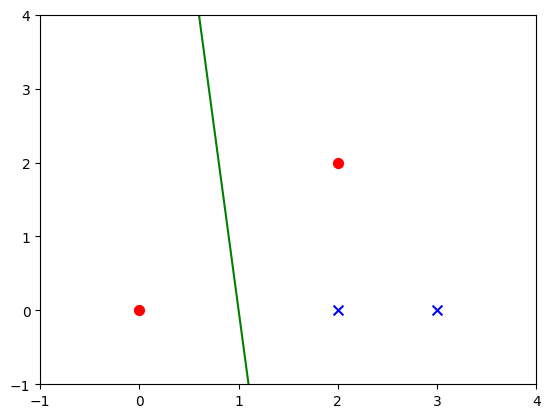

In [58]:
aff_donnees(X_exemple,Y_exemple,[min_X_exemple,max_X_exemple],[min_X_exemple,max_X_exemple],50)
affichePlan([1,0.1],-1,[min_X_exemple,max_X_exemple])

PAS séparateur : on voir que une donné est du mauvais coté 

     pcost       dcost       gap    pres   dres
 0:  3.2653e-01  1.9592e+00  6e+00  2e+00  4e+00
 1:  1.5796e+00  8.5663e-01  7e-01  2e-16  2e-15
 2:  1.0195e+00  9.9227e-01  3e-02  2e-16  6e-16
 3:  1.0002e+00  9.9992e-01  3e-04  1e-16  2e-15
 4:  1.0000e+00  1.0000e+00  3e-06  2e-16  2e-15
 5:  1.0000e+00  1.0000e+00  3e-08  0e+00  1e-15
Optimal solution found.


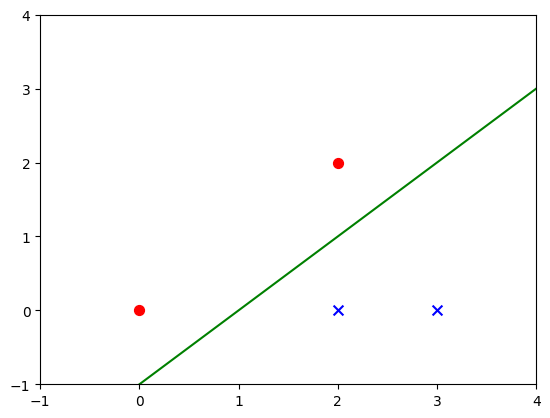

In [59]:
def Resoud_primal(X,y):

    # input : 
    # X : matrice des données
    # y : vecteur des labels
    # output :
    # w : paramètre de l'hyperplan séparateur
    # b : biais

    #nombre de exemple de la bse
    N= len(y)

    #dimension de l'espace
    n= len(X[0])
    q = np.zeros((n+1,1))

    # faire +0. permet de faire une transfrmation float
    q=cvxopt.matrix(q+0.)
    

    P1=np.concatenate((np.zeros((1,1)),np.zeros((1,n))),axis=1) #un 0 en haut a Gauche, une matrice de R(1Xn) de 0 en haut a droite
    P2=np.concatenate((np.zeros((n,1)),np.eye(n)),axis=1)
    P=np.concatenate((P1,P2),axis=0)
    P=cvxopt.matrix(P)

    #matrice h
    h = -1*np.ones((N,1))
    h=cvxopt.matrix(h+0.)

    for i in range(N):

        #g correspond a une ligne
        g=np.concatenate((np.reshape(-y[i],(1,1)), np.reshape(-y[i]*X[i][:],(1,2))),axis=1)
        if i==0:
            G=g
        else:
            G=np.concatenate((G, g), axis=0)

    G=cvxopt.matrix(G+0.)
    
    sol=cvxopt.solvers.qp(P,q,G,h)
    w=np.array(sol['x'][1:])
    b=np.array(sol['x'][0])
    
    return w,b



w,b=Resoud_primal(X_exemple,Y_exemple)

aff_donnees(X_exemple,Y_exemple,[min_X_exemple,max_X_exemple],[min_X_exemple,max_X_exemple],50)
affichePlan(w,b,[min_X_exemple,max_X_exemple])

**l'hyperplan semble plus cohérent**

In [60]:
def Resoud_primal_avec_marge(X,y,C):
  N = X.shape[0]
  n = X.shape[1]

  q = np.concatenate((np.zeros((n+1,1)), C*np.ones((N,1))), axis=0)
  q = cvxopt.matrix(q)


  P1 = np.concatenate((np.zeros((1,1)),np.zeros((1,n)), np.zeros((1,N))), axis=1)
  P2 = np.concatenate((np.zeros((n,1)),np.eye(n), np.zeros((n,N))), axis=1)
  P3 = np.concatenate((np.zeros((N,1)), np.zeros((N,n)), np.zeros((N,N))), axis=1)
  P = np.concatenate((P1,P2,P3),axis=0)
  P = cvxopt.matrix(P)


  h = np.concatenate((-1*np.ones((N,1)), np.zeros((N,1))), axis=0)
  h = cvxopt.matrix(h)



  for i in range(N):
    g1=np.concatenate((np.reshape(-y[i],(1,1)), np.reshape(-y[i]*X[i][:],(1,2))),axis=1)
    if i==0:
      G1=g1
    else:
      G1=np.concatenate((G1, g1), axis=0)

  G1 = np.concatenate((G1, np.zeros((N,n+1))), axis=0)


  G2 = np.concatenate((-1*np.eye(N), -1*np.eye(N)), axis=0)
  G = np.concatenate((G1,G2),axis=1)
  G=cvxopt.matrix(G+0.)

  #renvoie un dictionnaire : on récupère les valeurs avec sol['x'] ==> vecteur z dans le cours
  sol = cvxopt.solvers.qp(P, q, G, h)

  b_souple = sol['x'][0]
  w_souple = np.array(sol['x'][1:n+1])
  print("w_souple = ", w_souple, "b_souple = ", b_souple)
  return  w_souple,b_souple


     pcost       dcost       gap    pres   dres
 0: -2.9499e+14 -2.1430e+13  9e+13  1e+07  3e-16
 1: -1.4130e+13 -4.6845e+12  1e+13  7e+05  2e-09
 2:  7.8990e+11 -6.8632e+11  1e+12  3e-10  3e-15
 3:  1.1041e+11 -9.8884e+10  2e+11  2e-10  3e-16
 4:  1.5691e+10 -1.4195e+10  3e+10  4e-11  3e-16
 5:  2.2417e+09 -2.0353e+09  4e+09  3e-11  2e-16
 6:  3.2089e+08 -2.9172e+08  6e+08  6e-12  5e-16
 7:  4.5967e+07 -4.1802e+07  9e+07  4e-12  1e-16
 8:  6.5873e+06 -5.9889e+06  1e+07  2e-12  2e-16
 9:  9.4442e+05 -8.5768e+05  2e+06  5e-13  2e-16
10:  1.3553e+05 -1.2270e+05  3e+05  3e-13  2e-16
11:  1.9497e+04 -1.7507e+04  4e+04  9e-14  3e-16
12:  2.8228e+03 -2.4797e+03  5e+03  2e-14  4e-16
13:  4.1564e+02 -3.4406e+02  8e+02  5e-15  3e-16
14:  6.3973e+01 -4.4740e+01  1e+02  4e-15  2e-16
15:  1.1051e+01 -4.3704e+00  2e+01  2e-15  3e-16
16:  2.5554e+00  5.0539e-01  2e+00  4e-16  5e-16
17:  1.1211e+00  9.5749e-01  2e-01  2e-16  2e-16
18:  1.0016e+00  9.9923e-01  2e-03  2e-16  2e-16
19:  1.0000e+00  9.99

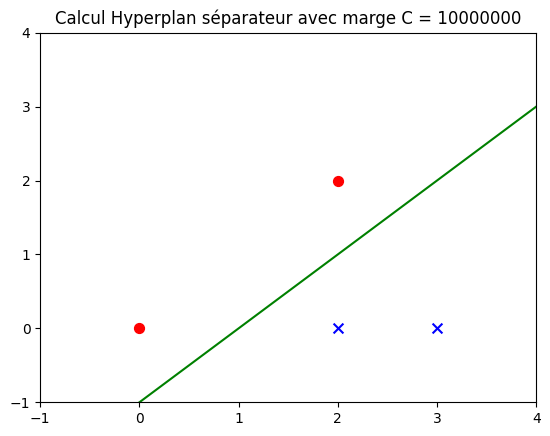

     pcost       dcost       gap    pres   dres
 0:  3.1125e-01  1.1646e+00  1e+01  2e+00  7e+00
 1:  7.0036e-01  4.5698e-03  7e-01  6e-02  2e-01
 2:  3.9782e-01  3.1903e-01  8e-02  3e-16  6e-17
 3:  3.3585e-01  3.3404e-01  2e-03  2e-16  1e-16
 4:  3.3501e-01  3.3499e-01  2e-05  2e-16  2e-16
 5:  3.3500e-01  3.3500e-01  2e-07  2e-16  3e-16
Optimal solution found.
w_souple =  [[ 0.29999983]
 [-0.19999997]] b_souple =  -0.3965531113933242


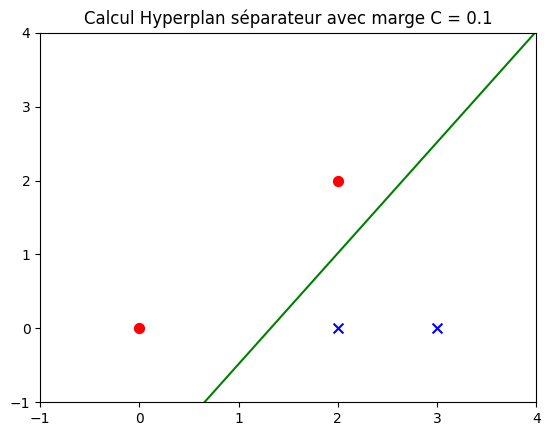

In [61]:
C = 10000000


w,b=Resoud_primal_avec_marge(X_exemple,Y_exemple,C)
plt.title("Calcul Hyperplan séparateur avec marge C = "+str(C))
aff_donnees(X_exemple,Y_exemple,[min_X_exemple,max_X_exemple],[min_X_exemple,max_X_exemple],50)
affichePlan(w,b,[min_X_exemple,max_X_exemple])

C = 0.1
w,b=Resoud_primal_avec_marge(X_exemple,Y_exemple,C)
plt.title("Calcul Hyperplan séparateur avec marge C = "+str(C))
aff_donnees(X_exemple,Y_exemple,[min_X_exemple,max_X_exemple],[min_X_exemple,max_X_exemple],50)
affichePlan(w,b,[min_X_exemple,max_X_exemple])



# Avec la librairie sklearn

In [62]:

def apply_svm(X,Y,kernel_type='linear'):

    model = svm.SVC(kernel=kernel_type, C=1)
    model.fit(X, Y)
    #model.dual_coef_ ne renvoie pas quand c nul !!!

    # ce sont les alpha_i*y_i
    print("model.dual_coef_ = ", model.dual_coef_)

    # ce sont les x_i tq alpha_i > 0
    print("model.support_vectors_ = ", model.support_vectors_)

    #ce sont les indices des x_i tq alpha_i > 0
    print("model.support_ = ", model.support_)

    w = np.dot(model.dual_coef_,model.support_vectors_)
    b = Y[model.support_][0] - np.dot(w,X[model.support_][0])
 
    return w,b,model



def aff_frontiere(X,y,bornex,borney,model):
    aff_donnees(X,y,bornex,borney,50)

    # xx et yy sont des matrices de coordonnées
    xx, yy = np.meshgrid(np.linspace(bornex[0], bornex[1],50), np.linspace(borney[0], borney[1],50))
    xy = np.concatenate((np.reshape(xx,(xx.shape[0]*xx.shape[1],1)),np.reshape(yy,(yy.shape[0]*yy.shape[1],1))),axis=1)
    print(xy.shape)
    P = model.predict(xy)
    aff_donnees(xy,P,bornex,borney,1)


(2500, 2)


/home/spi-2019/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


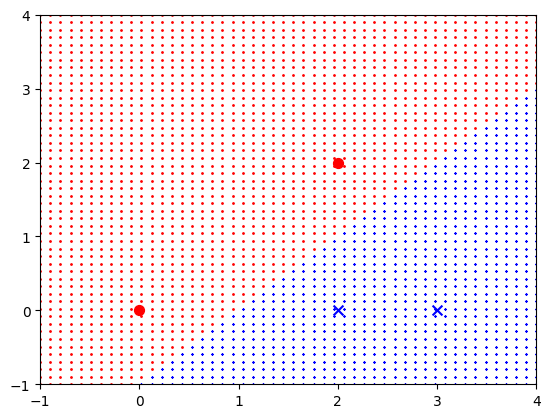

In [63]:
X_exemple = np.array([[0,0],[2,2],[2,0],[3,0]])
Y_exemple =np.array( [[-1],[-1],[1],[1]])


#on affiche le résultat
w_svm,b_svm,model_svm=apply_svm(X_exemple,Y_exemple)
aff_frontiere(X_exemple,Y_exemple,[min_X_exemple,max_X_exemple],[min_X_exemple,max_X_exemple],model_svm)

Python nous renvoie avec sa méthode les alpha et les vecteurs supports.

- + On augmente C, plus l'hyperplan fittera les données, mais la marge sera reduite
- + On diminue C, plus la marge sera grande, mais l'hyperplan sera moins bien fitter


# Exercice 5


Foncionnement de la fonction ```aff_frontiere``` :

- On plot sur un graphe via la fonction ```aff_donnees``` 
- Ensuite, via meshgrid, on crée un maillage de points, et on les plot sur le graphe
- ensuite, on cree xy pour reshape, pour construire des colonnes de x (N lignes, 1 colonnes) et pareil pour y
- ensuite , on fait la prediction sur chacun des points pour savoir si ils sont dans la classe 1 ou 2
- ensuite, on plot les points de la classe 1 et 2 sur le graphe


## avec noyau linéaire : ok !

/home/spi-2019/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


(2500, 2)


Text(0.5, 1.0, 'SVM avec noyau lineaire')

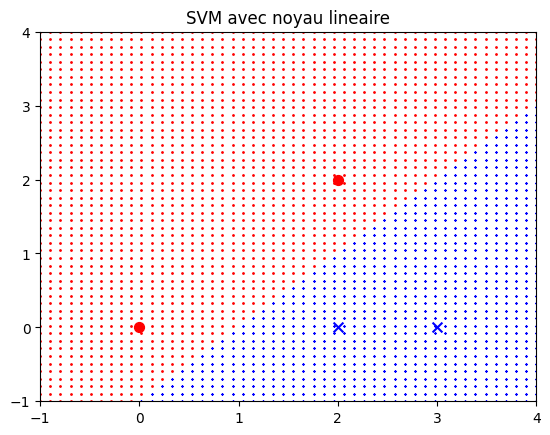

In [64]:
X_exemple = np.array([[0,0],[2,2],[2,0],[3,0]])
Y_exemple =np.array( [[-1],[-1],[1],[1]])

b,a,model_svm=apply_svm(X_exemple,Y_exemple,'linear')
aff_frontiere(X_exemple,Y_exemple,[min_X_exemple,max_X_exemple],[min_X_exemple,max_X_exemple],model_svm)
plt.title("SVM avec noyau lineaire")

# avec un noyau rbf : marche très bien !

/home/spi-2019/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


(2500, 2)


Text(0.5, 1.0, 'SVM avec noyau RBF')

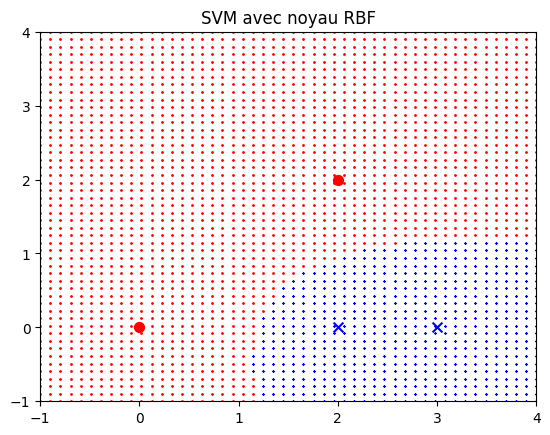

In [65]:

X_exemple = np.array([[0,0],[2,2],[2,0],[3,0]])
Y_exemple =np.array( [[-1],[-1],[1],[1]])

w,b,model_rbf= apply_svm(X_exemple,Y_exemple,'rbf')
aff_frontiere(X_exemple,Y_exemple,[min_X_exemple,max_X_exemple],[min_X_exemple,max_X_exemple],model_rbf)
plt.title("SVM avec noyau RBF")

## Expliquation du changement de dimension :

On ne sait pas quel kernel/transformation on a appliqué, mais c'est pas grave. Dans la vie reelle, on choisira le noyay qui donnera le meilleur reslutat sur la matrice de confusion.

Ajout du point [ 2.1  2.5 ]

# On ajoute un point 

/home/spi-2019/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


(2500, 2)


Text(0.5, 1.0, 'SVM avec noyau RBF')

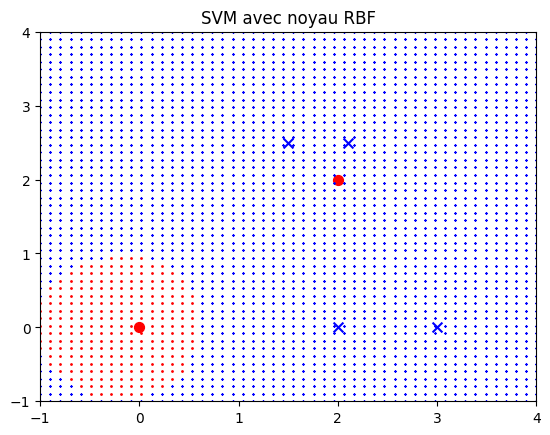

In [66]:
X_exemple = np.array([[0,0],[2,2],[2,0],[3,0],[2.1,2.5],[1.5,2.5]])
Y_exemple =np.array( [[-1],[-1],[1],[1],[1],[1]])

w,b,model_rbf= apply_svm(X_exemple,Y_exemple,'rbf')

aff_frontiere(X_exemple,Y_exemple,[min_X_exemple,max_X_exemple],[min_X_exemple,max_X_exemple],model_rbf)
plt.title("SVM avec noyau RBF")

# Avec les datas du fichiers

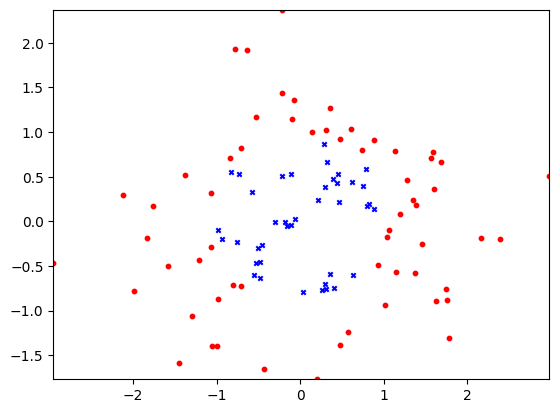

In [67]:
X=np.load("data/arr_0.npy", allow_pickle=True)
Y=np.load("data/arr_1.npy", allow_pickle=True)

min_x = np.min(X[:,0])
max_x = np.max(X[:,0])
min_y = np.min(X[:,1])
max_y = np.max(X[:,1])
aff_donnees(X,Y,(min_x,max_x),(min_y,max_y),10)

(2500, 2)


Text(0.5, 1.0, 'SVM avec noyau lineaire')

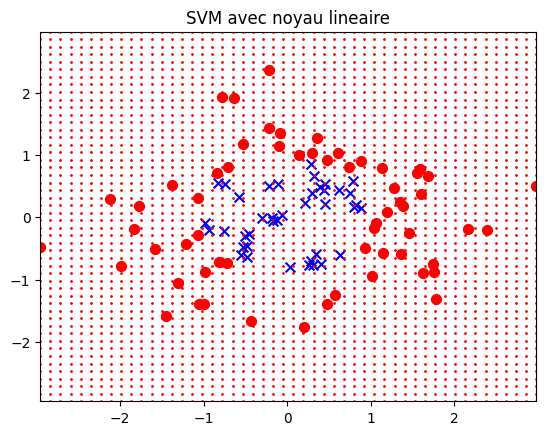

In [68]:
b,a,model_svm=apply_svm(X,Y)
min_x = np.min(X[:,0])
max_x = np.max(X[:,0])

aff_frontiere(X,Y,(min_x,max_x),(min_x,max_x),model_svm)
plt.title("SVM avec noyau lineaire")

In [69]:
b,a,model_svm=apply_svm(X,Y,'poly')
min_x = np.min(X[:,0])
max_x = np.max(X[:,0])

aff_frontiere(X,Y,(min_x,max_x),(min_x,max_x),model_svm)
plt.title("SVM avec noyau poly")

(2500, 2)


Text(0.5, 1.0, 'SVM avec noyau poly')

In [ ]:
b,a,model_svm=apply_svm(X,Y,'poly')


#now, let's see the accuracy of the model


# Quelqus questions

- NON on ne peut pas apprendre des données non linéairement séparables avec un noyau linéaire
- un SVM avec un noyau RBF c'est bien !!!